In [17]:
tree = SixB('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/trigger/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/trigger/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


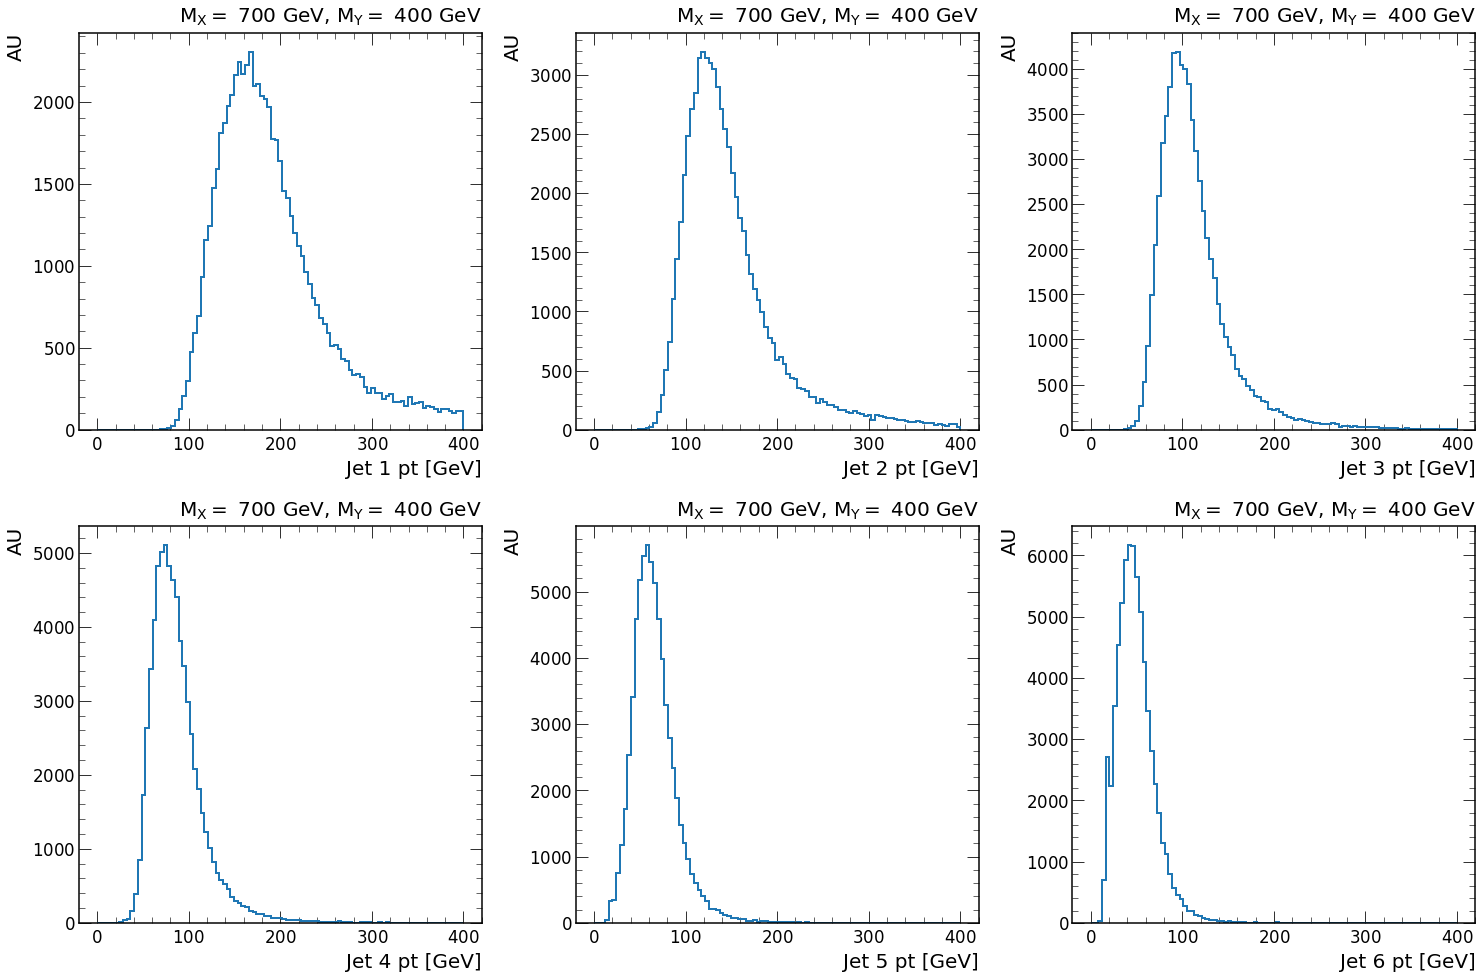

In [19]:
pt_sort_mask = ak.argsort(tree.jet_ptRegressed, axis=1, ascending=False)

fig, axs = plt.subplots(figsize=(21,14), nrows=2, ncols=3)

for i,ax in enumerate(axs.flatten()):
    n = Hist(tree.jet_ptRegressed[pt_sort_mask][:,i], bins=np.linspace(0,400,100), ax=ax)
    ax.set_xlabel(f"Jet {i+1} pt [GeV]")
    ax.set_ylabel('AU')
    ax.set_title(tree.sample)

plt.tight_layout()

fig.savefig('jet_pt.pdf')

In [17]:
tree.jet_signalId[:,6:]

<Array [[1, -1], [-1, 3, ... [-1, -1, -1, -1]] type='569341 * var * int32'>

In [18]:
btag_sort_mask = ak.argsort(tree.jet_btag, axis=1, ascending=False)
btag_sort_higgsjet_first6_mask = tree.jet_signalId[btag_sort_mask][:,:6] > -1
higgs_jet_mask = tree.jet_signalId > -1

n_hjet_first6 = ak.sum(btag_sort_higgsjet_first6_mask, axis=1)
n_hjet = ak.sum(higgs_jet_mask, axis=1)

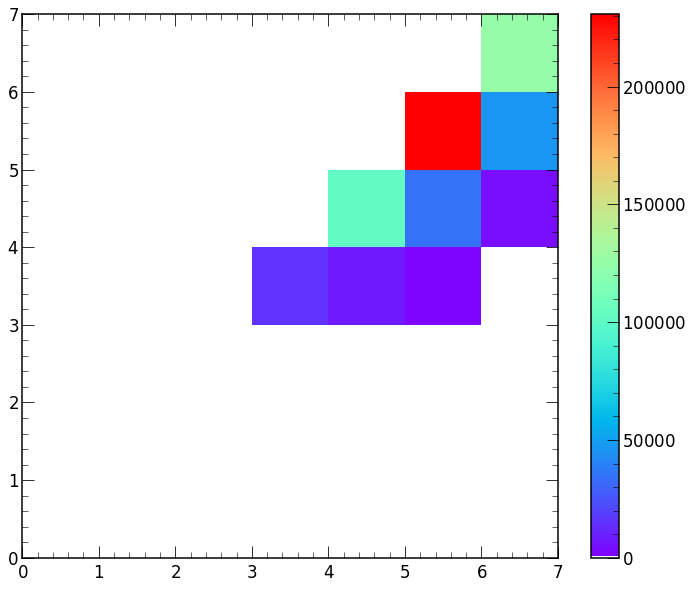

In [20]:
fig, ax = plt.subplots(figsize=(12,10))

n, ex, ey, im = Hist2d(n_hjet, n_hjet_first6, ax=ax, bins=np.arange(8))
fig.colorbar(im, ax=ax)